In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [2]:
X_train, X_test, y_train, y_test = load('../../preprocesiranje/classification_data.joblib')

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from termcolor import colored

In [4]:
def model_info(y_real, y_pred):
    # mere kvaliteta
    print(classification_report(y_real, y_pred))
    
    # matrica konfuzije
    y_true = np.array(y_real)
    y_pred = np.array(y_pred)

    # kreiranje matrice konfuzije
    conf_matrix = confusion_matrix(y_true, y_pred)

    # kreiranje heatmap-e za matricu konfuzije
    plt.figure(figsize = (3, 3))
    class_names = [-1, 0, 1]
    sns.heatmap(conf_matrix, annot = True, cmap = 'Greens', fmt = 'd', cbar = True, xticklabels = class_names, yticklabels = class_names)
    plt.xlabel('Predict values')
    plt.ylabel('Real values')
    plt.title('Confusion matrix')
    plt.show()

In [5]:
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    return model, y_train_pred, y_test_pred

# Stablo odlučivanja

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [7]:
dtc = DecisionTreeClassifier(random_state = 42)
dtc_model, y_train_pred_dtc, y_test_pred_dtc = build_model(dtc, X_train, X_test, y_train, y_test)

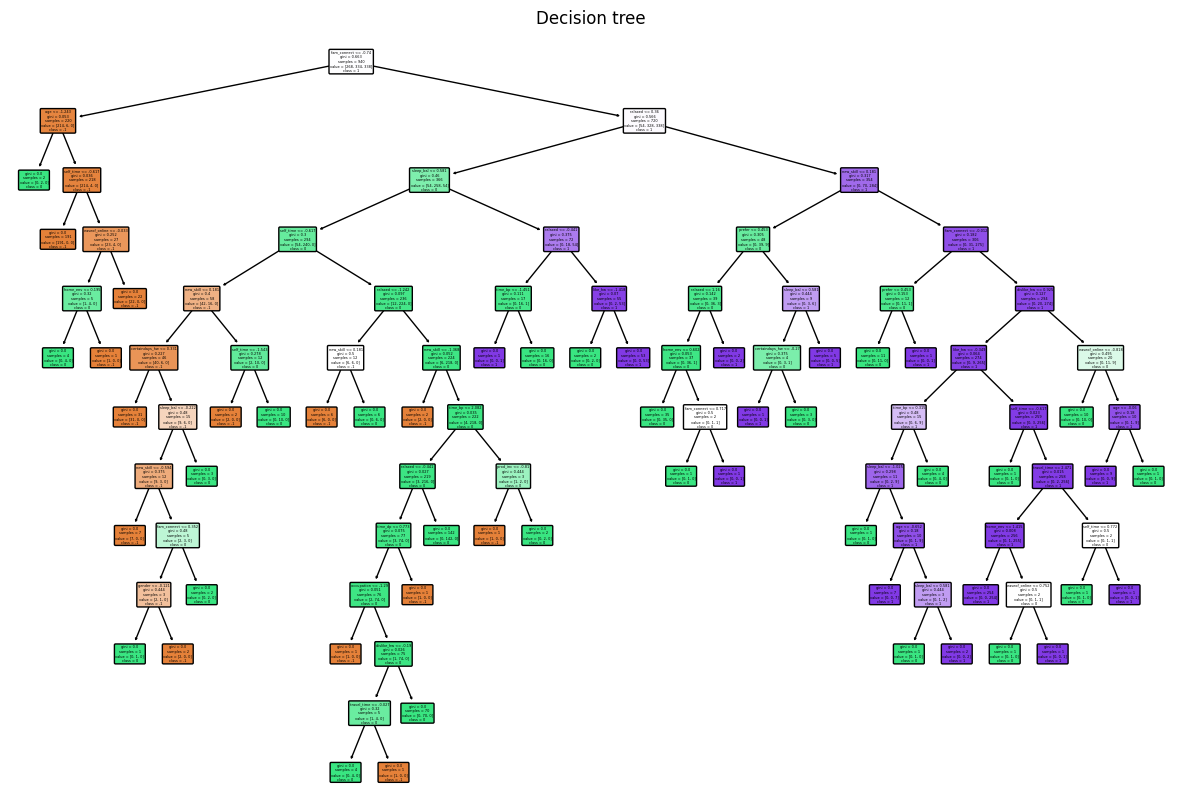

Broj čvorova: 101, dubina: 12


In [8]:
# vizualizacija stabla odlučivanja
plt.figure(figsize=(15, 10))
plot_tree(dtc_model, feature_names = X_train.columns, class_names = ['-1', '0', '1'], filled = True, rounded = True)
plt.title("Decision tree")
plt.show()

# informacije o broju čvorova i dubini
num_nodes = dtc_model.tree_.node_count
depth = dtc_model.tree_.max_depth
print(f'Broj čvorova: {num_nodes}, dubina: {depth}')

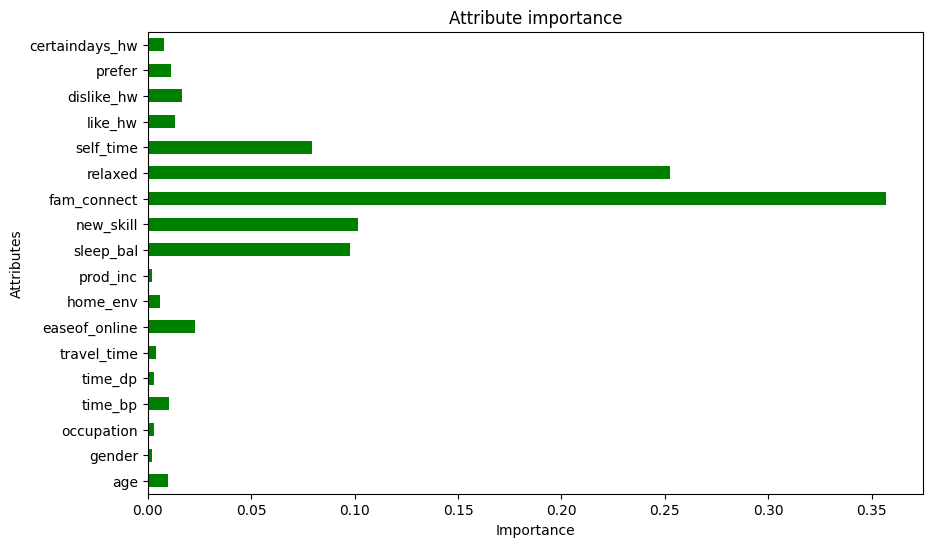

In [9]:
# izračunavanje važnosti atributa
feature_importance = pd.Series(dtc_model.feature_importances_, index = X_train.columns)

# vizualizacija važnosti atributa u grafikonu
plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

Train data:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       268
           0       1.00      1.00      1.00       334
           1       1.00      1.00      1.00       338

    accuracy                           1.00       940
   macro avg       1.00      1.00      1.00       940
weighted avg       1.00      1.00      1.00       940



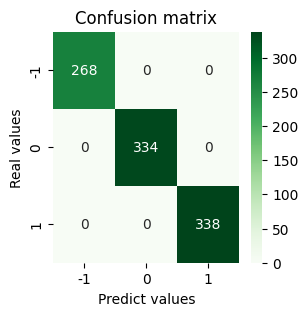


-------------------------------------------------------

Test data:

              precision    recall  f1-score   support

          -1       0.92      0.98      0.95        58
           0       0.90      0.91      0.91        94
           1       0.96      0.89      0.92        83

    accuracy                           0.92       235
   macro avg       0.93      0.93      0.93       235
weighted avg       0.92      0.92      0.92       235



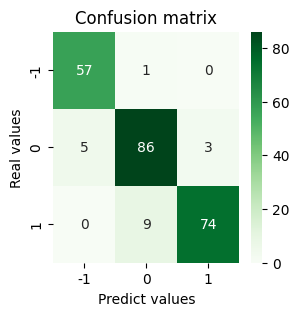

In [10]:
print('Train data:\n')
model_info(y_train, y_train_pred_dtc)

print('\n-------------------------------------------------------\n')

print('Test data:\n')
model_info(y_test, y_test_pred_dtc)

Na osnovu analize rezultata možemo zaključiti da je model odlučivanja veoma dobro istreniran na trening skupu, gde su sve metrike bile savršene. Međutim, na test skupu, iako su metrike performansi veoma visoke, primećujemo da model dosta greši, posebno u klasifikaciji instance klase 1. Ovakvi rezultati ukazuju na to da se naš model preprilagodio trening podacima.

### Podešavanje hiper-parametara modela

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 7, 9, 11],
    'min_samples_leaf': [3, 4, 5, 6],
    'class_weight': [None, 'balanced']
}

In [13]:
estimator_dtc = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid = params, scoring = 'accuracy')

In [14]:
estimator_dtc.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 11],
                         'min_samples_leaf': [3, 4, 5, 6]},
             scoring='accuracy')

In [15]:
estimator_dtc.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 3}

In [16]:
estimator_dtc.best_score_

0.9446808510638298

In [17]:
best_model_dtc, y_train_pred_dtccv, y_test_pred_dtccv = build_model(estimator_dtc.best_estimator_, X_train, X_test, y_train, y_test)

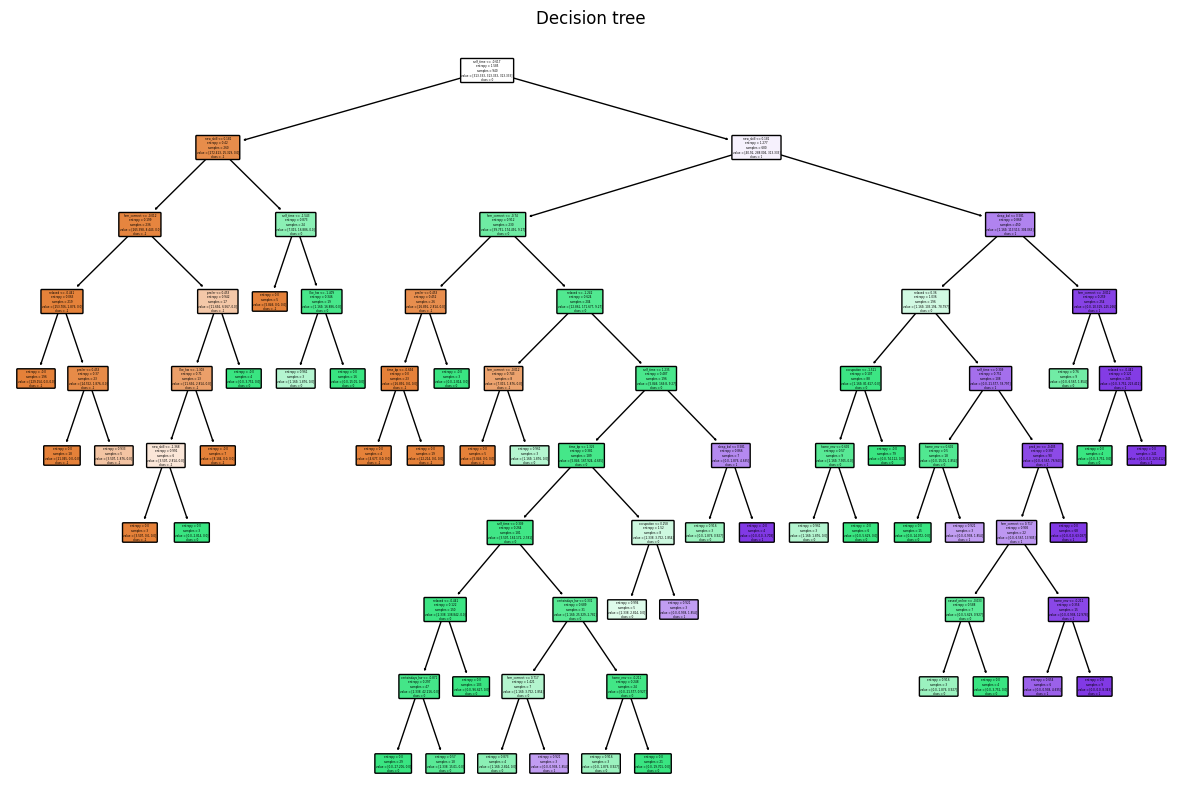

Broj čvorova: 77, dubina: 9


In [18]:
# vizualizacija stabla odlučivanja
plt.figure(figsize=(15, 10))
plot_tree(best_model_dtc, feature_names = X_train.columns, class_names = ['-1', '0', '1'], filled = True, rounded = True)
plt.title("Decision tree")
plt.show()

# informacije o broju čvorova i dubini
num_nodes = best_model_dtc.tree_.node_count
depth = best_model_dtc.tree_.max_depth
print(f'Broj čvorova: {num_nodes}, dubina: {depth}')

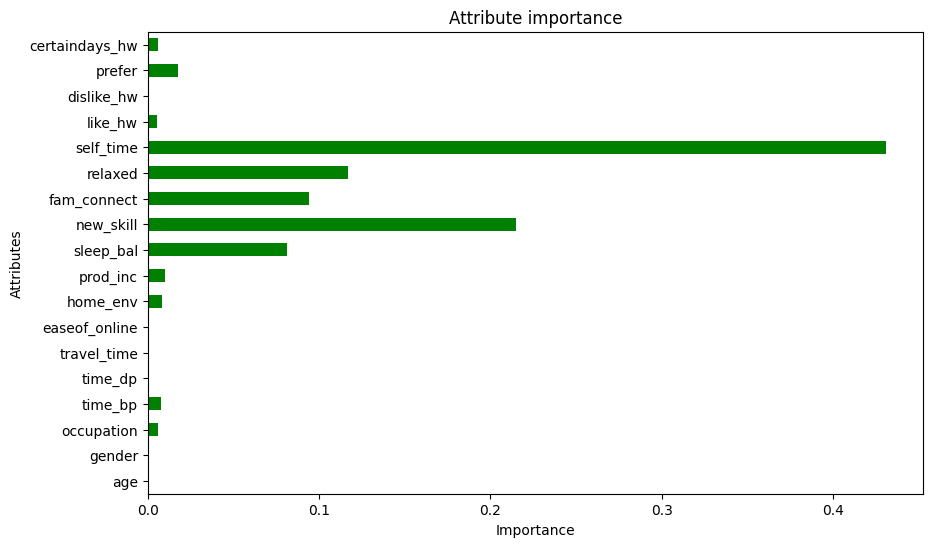

In [19]:
# izračunavanje važnosti atributa
feature_importance = pd.Series(best_model_dtc.feature_importances_, index = X_train.columns)

# vizualizacija važnosti atributa u grafikonu
plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

Zanimljivo je da 

Train data:

              precision    recall  f1-score   support

          -1       0.99      0.97      0.98       268
           0       0.96      0.98      0.97       334
           1       0.99      0.99      0.99       338

    accuracy                           0.98       940
   macro avg       0.98      0.98      0.98       940
weighted avg       0.98      0.98      0.98       940



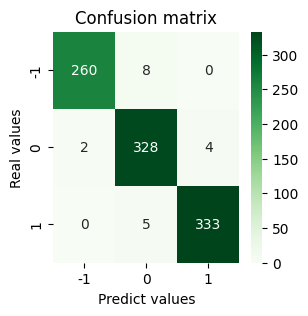


-------------------------------------------------------

Test data:

              precision    recall  f1-score   support

          -1       0.97      0.97      0.97        58
           0       0.92      0.96      0.94        94
           1       0.97      0.93      0.95        83

    accuracy                           0.95       235
   macro avg       0.95      0.95      0.95       235
weighted avg       0.95      0.95      0.95       235



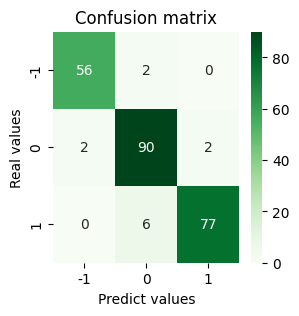

In [20]:
print('Train data:\n')
model_info(y_train, y_train_pred_dtccv)

print('\n-------------------------------------------------------\n')

print('Test data:\n')
model_info(y_test, y_test_pred_dtccv)

Ovaj model odlučivanja pokazuje dobre rezultate na trening i test podacima. Performanse su dosta visoke (i ujednačene) za sve tri klase.

# Slučajne šume

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier(random_state = 42)
rf_model, y_train_pred_rf, y_test_pred_rf = build_model(rf, X_train, X_test, y_train, y_test)

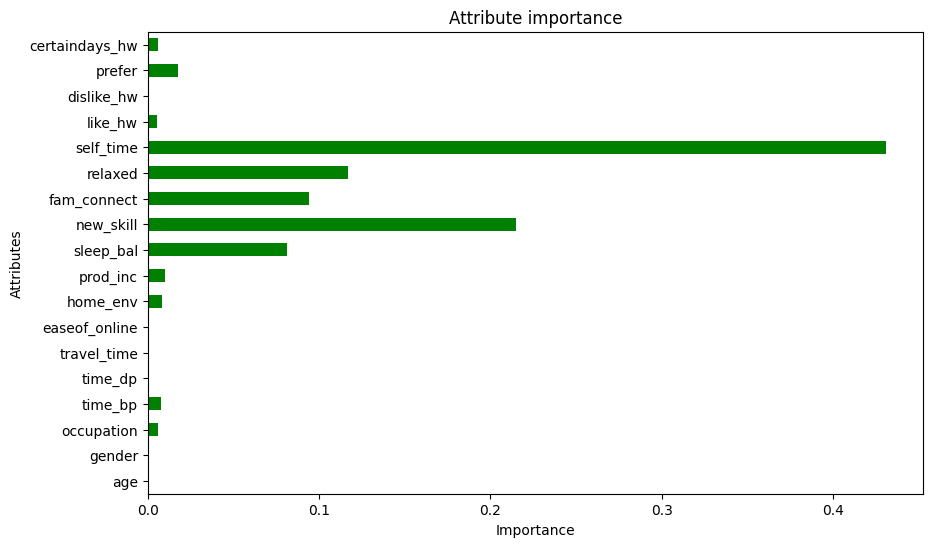

In [23]:
# izračunavanje važnosti atributa
feature_importance = pd.Series(best_model_dtc.feature_importances_, index = X_train.columns)

# vizualizacija važnosti atributa u grafikonu
plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

Train data:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       268
           0       1.00      1.00      1.00       334
           1       1.00      1.00      1.00       338

    accuracy                           1.00       940
   macro avg       1.00      1.00      1.00       940
weighted avg       1.00      1.00      1.00       940



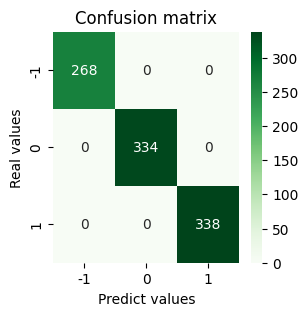


-------------------------------------------------------

Test data:

              precision    recall  f1-score   support

          -1       0.95      0.98      0.97        58
           0       0.95      0.96      0.95        94
           1       0.99      0.95      0.97        83

    accuracy                           0.96       235
   macro avg       0.96      0.96      0.96       235
weighted avg       0.96      0.96      0.96       235



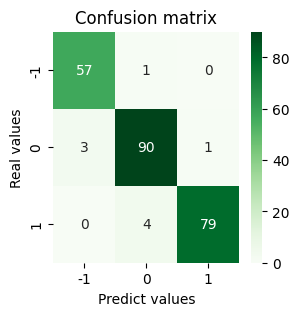

In [24]:
print('Train data:\n')
model_info(y_train, y_train_pred_rf)

print('\n-------------------------------------------------------\n')

print('Test data:\n')
model_info(y_test, y_test_pred_rf)

Model pokazuje visoku sposobnost klasifikacije za sve tri klase i na trening i na test skupu. Generalizacija modela sa treninga na test je takođe dobra. Međutim, postoji nekoliko slučajeva netačnih klasifikacija na test skupu, što ukazuje na potrebu za daljom analizom i optimizacijom modela.

### Podešavanje hiper-parametara modela

In [25]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 200, 300],
}

In [26]:
estimator_rf = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid = params)

In [27]:
estimator_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 200, 300]})

In [28]:
estimator_rf.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

In [29]:
estimator_rf.best_score_

0.9680851063829786

In [30]:
best_model_rf, y_train_pred_rfcv, y_test_pred_rfcv = build_model(estimator_rf.best_estimator_, X_train, X_test, y_train, y_test)

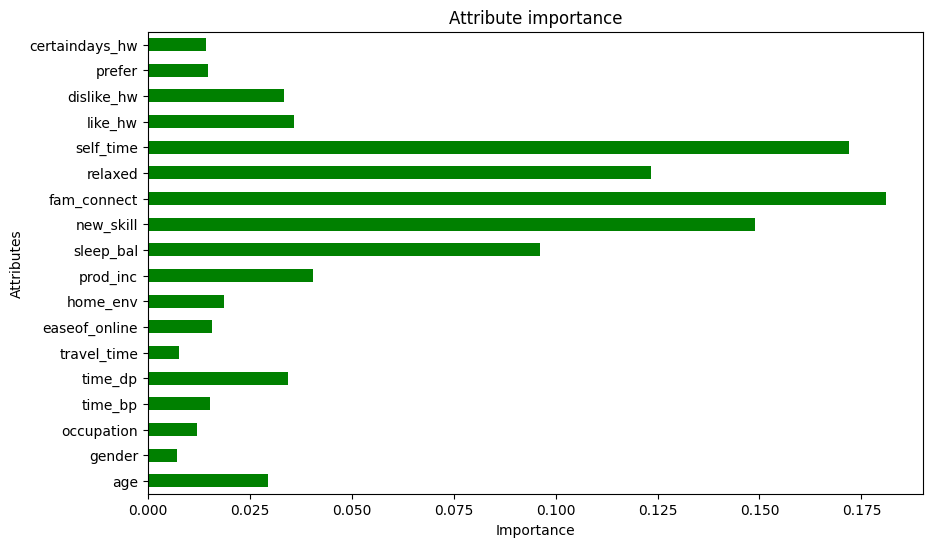

In [31]:
# izračunavanje važnosti atributa
feature_importance = pd.Series(best_model_rf.feature_importances_, index = X_train.columns)

# vizualizacija važnosti atributa u grafikonu
plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

Train data:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       268
           0       1.00      1.00      1.00       334
           1       1.00      1.00      1.00       338

    accuracy                           1.00       940
   macro avg       1.00      1.00      1.00       940
weighted avg       1.00      1.00      1.00       940



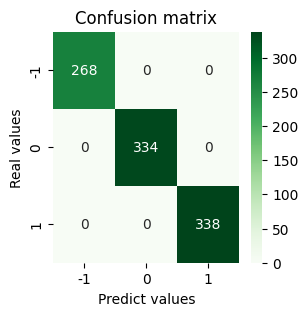


-------------------------------------------------------

Test data:

              precision    recall  f1-score   support

          -1       0.98      0.97      0.97        58
           0       0.94      0.98      0.96        94
           1       0.99      0.95      0.97        83

    accuracy                           0.97       235
   macro avg       0.97      0.97      0.97       235
weighted avg       0.97      0.97      0.97       235



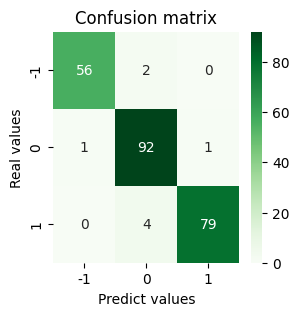

In [32]:
print('Train data:\n')
model_info(y_train, y_train_pred_rfcv)

print('\n-------------------------------------------------------\n')

print('Test data:\n')
model_info(y_test, y_test_pred_rfcv)

Ovaj model pokazuje najbolje, do sada, performanse na oba skupa podataka, s visokim ocenama za preciznost, odziv i F1-score. 

# Poređenje modela

Zanimljivo je da su svi modeli prepoznali i dali značajan uticaj atributima: self_time, fam_connect, new_skill, relaxed, i sleep_bal na osnovu kojih je i napravljena naša ciljna promenljiva.

### ROC kriva 

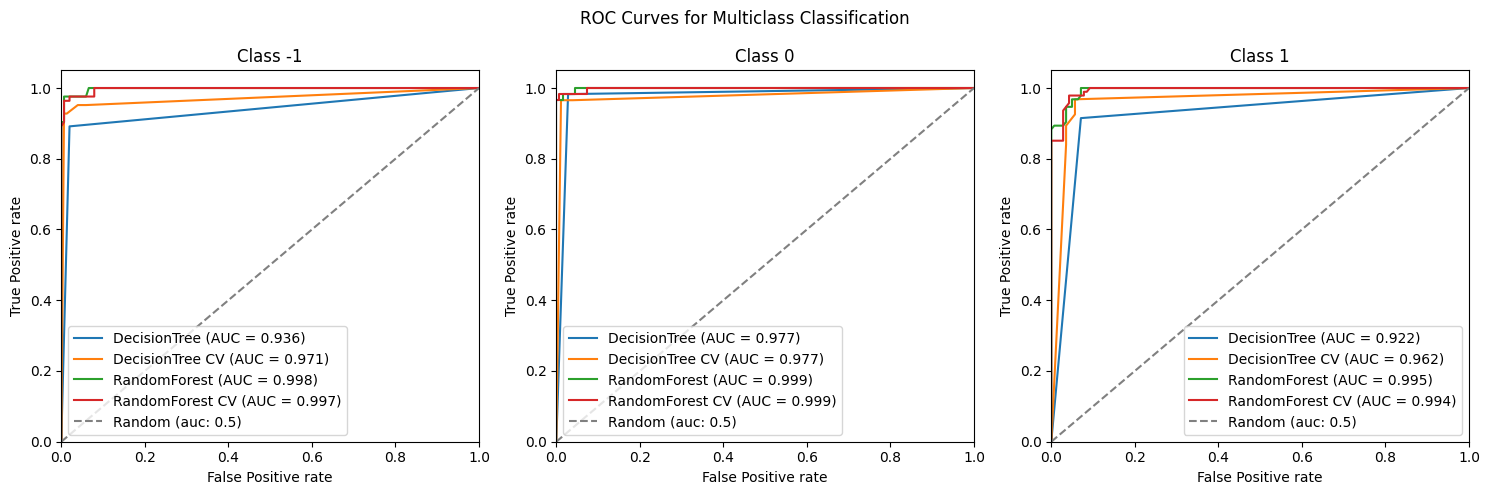

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# binarizacija ciljnih vrednosti (zbog višeklasne klasifikacije)
y_train_bin = label_binarize(y_train, classes=[-1, 0, 1])
y_test_bin = label_binarize(y_test, classes=[-1, 0, 1])

# definisanje modela i imena modela
models = [dtc_model, best_model_dtc, rf_model, best_model_rf]
model_names = ['DecisionTree', 'DecisionTree CV', 'RandomForest', 'RandomForest CV']

# inicijalizacija grafa
plt.figure(figsize = (15, 5))

# petlja za svaku klasu
for class_index in range(y_train_bin.shape[1]):
    # prikazivanje svake klase u odvojenom subplotu
    plt.subplot(1, y_train_bin.shape[1], class_index + 1)  
    plt.title(f'Class {class_index - 1}')
    
    # petlja za svaki model
    for model, model_name in zip(models, model_names):
        # izračunavanje vrednosti za ROC krivu i AUC
        y_pred = model.predict_proba(X_test) # Probabilities for positive class
   
        fpr, tpr, _ = roc_curve(y_test_bin[:, class_index-1],  y_pred[:, class_index-1])
        roc_auc = auc(fpr, tpr)

        # prikazivanje ROC krive za svaki model
        plt.plot(fpr, tpr, label = f'{model_name} (AUC = {roc_auc:.3f})')
        
    plt.plot([0, 1], [0, 1], label = 'Random (auc: 0.5)', color = 'grey', linestyle='--')
    
    # podešavanje osa za svaki subplot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.legend()

plt.suptitle('ROC Curves for Multiclass Classification')
plt.tight_layout()
plt.show()

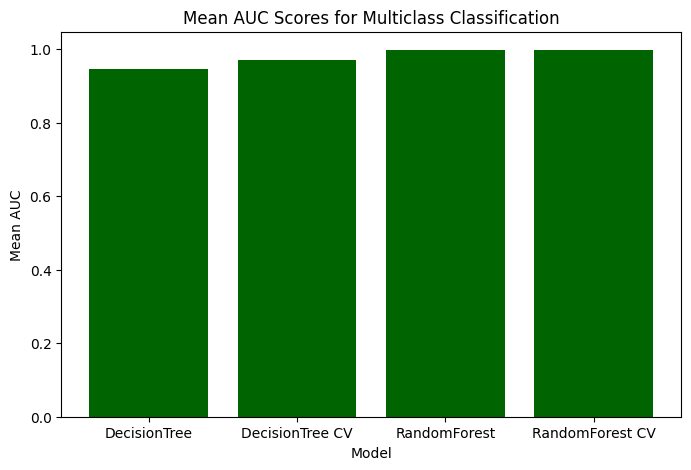

In [34]:
# izračunavanje usrednjenih AUC vrednosti za svaki model
mean_auc_scores = []

for model in models:
    y_pred = model.predict_proba(X_test)
    
    auc_scores = []
    for class_index in range(y_train_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, class_index-1], y_pred[:, class_index-1])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
    
    mean_auc_scores.append(np.mean(auc_scores))

# vizualizacija usrednjene AUC vrednosti
plt.figure(figsize = (8, 5))
plt.bar(model_names, mean_auc_scores, color = 'darkgreen')
plt.xlabel('Model')
plt.ylabel('Mean AUC')
plt.title('Mean AUC Scores for Multiclass Classification')
plt.show()

### Vizualizacija klasifikacije

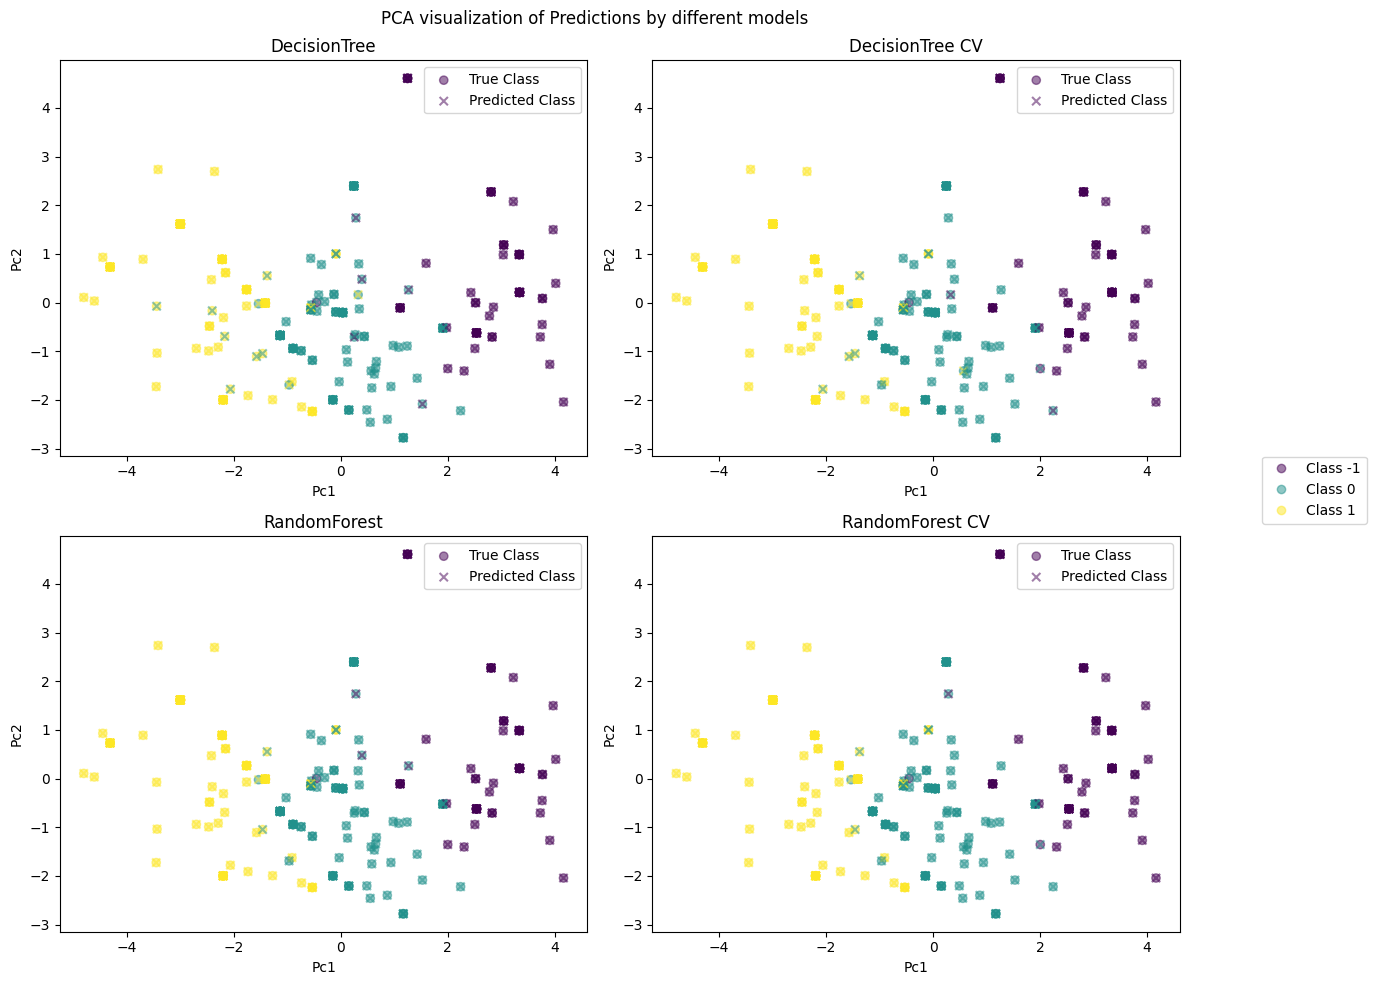

In [35]:
from sklearn.decomposition import PCA

num_dimensions = 2
class_name = y_test.unique()
y_preds = [y_test_pred_dtc, y_test_pred_dtccv, y_test_pred_rf, y_test_pred_rfcv]

# PCA modela
pca = PCA(n_components = num_dimensions)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
           
# raspoređivanje podataka u subplotovima
num_rows = 2
num_cols = 2         
fig, axes = plt.subplots(num_rows, num_cols, figsize = (12, 10))
for row in range(num_rows):
    for col in range(num_cols):
        model_idx = row * num_cols + col
        if model_idx < len(models):
            ax = axes[row, col]
            y_pred = y_preds[row * num_cols + col]
            model_name = model_names[model_idx]
            
            sc1 = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_test, marker = 'o', label = f'True Class', alpha=0.5)
            sc2 = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_pred, marker = 'x', label = f'Predicted Class', alpha=0.5)
            
            ax.set_title(f'{model_name}')
            ax.set_xlabel('Pc1')
            ax.set_ylabel('Pc2')
            ax.legend()
            
            
# dodavanje legendi na celu figuru
cmap = plt.cm.viridis
color_list = [cmap(i) for i in range(len(np.unique(y_test)))]
fig.legend(handles = sc1.legend_elements()[0], labels = [f'Class {class_idx}' for class_idx in ['-1', '0', '1']], 
           bbox_to_anchor = (1.05, 0.5), loc = 'center left')

plt.suptitle('PCA visualization of Predictions by different models')
plt.tight_layout()
plt.show()

# Čuvanje modela

In [36]:
from joblib import dump

In [37]:
dump(models, 'trees.joblib')

['trees.joblib']